# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [2]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


(60000, 28, 28)


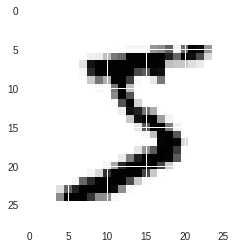

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [8]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 13))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 10)        330       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          16910     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total para

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 20s 340us/step - loss: 0.3118 - acc: 0.9075
Epoch 2/10
59136/60000 [============================>.] - ETA: 0s - loss: 0.1164 - acc: 0.9655

60000/60000 [==============================] - 19s 317us/step - loss: 0.1163 - acc: 0.9655
Epoch 3/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.0849 - acc: 0.9743
Epoch 4/10
20864/60000 [=========>....................] - ETA: 12s - loss: 0.0703 - acc: 0.9789

60000/60000 [==============================] - 19s 317us/step - loss: 0.0692 - acc: 0.9786
Epoch 5/10
60000/60000 [==============================] - 19s 319us/step - loss: 0.0590 - acc: 0.9817
Epoch 6/10
 9024/60000 [===>..........................] - ETA: 16s - loss: 0.0466 - acc: 0.9854

60000/60000 [==============================] - 19s 319us/step - loss: 0.0549 - acc: 0.9826
Epoch 7/10
60000/60000 [==============================] - 19s 318us/step - loss: 0.0496 - acc: 0.9848
Epoch 8/10
 5728/60000 [=>............................] - ETA: 17s - loss: 0.0383 - acc: 0.9862

60000/60000 [==============================] - 19s 321us/step - loss: 0.0456 - acc: 0.9852
Epoch 9/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0437 - acc: 0.9856
Epoch 10/10
 5856/60000 [=>............................] - ETA: 16s - loss: 0.0325 - acc: 0.9904

60000/60000 [==============================] - 18s 306us/step - loss: 0.0388 - acc: 0.9879


In [14]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.04816677725261543, 0.9852]


In [16]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[1.00980127e-10 3.34009016e-08 1.58506055e-07 8.64950107e-06
  2.61650233e-11 5.81949801e-11 9.68266358e-18 9.99991059e-01
  1.00523714e-10 6.17589677e-08]
 [3.36991377e-07 1.01124124e-05 9.99986887e-01 1.00146347e-09
  2.99594097e-14 2.02323349e-11 2.61314153e-06 5.12539718e-13
  8.43999448e-09 1.72978941e-13]
 [6.36587885e-08 9.99786913e-01 1.11918116e-05 1.03765636e-08
  1.93833966e-05 7.37477762e-07 5.24564882e-07 1.80716976e-04
  3.24735879e-07 7.16467170e-08]
 [9.99946594e-01 5.49735324e-09 1.44462476e-07 2.27273862e-08
  5.32740430e-09 6.83962220e-09 4.83729746e-05 4.18158152e-06
  9.53673833e-08 6.39745394e-07]
 [7.55060157e-08 4.89953891e-07 5.01472375e-09 4.49492044e-09
  9.99992371e-01 6.44756679e-11 6.72231693e-09 5.77484343e-06
  1.44373429e-08 1.26832288e-06]
 [2.29933107e-07 9.98305082e-01 1.77587917e-05 2.22420891e-08
  7.46227015e-05 2.49883186e-07 1.63203950e-07 1.59906514e-03
  2.51140727e-06 3.96835901e-07]
 [3.42059936e-09 2.59848548e-05 3.15313700e-05 6.87978101e

In [20]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

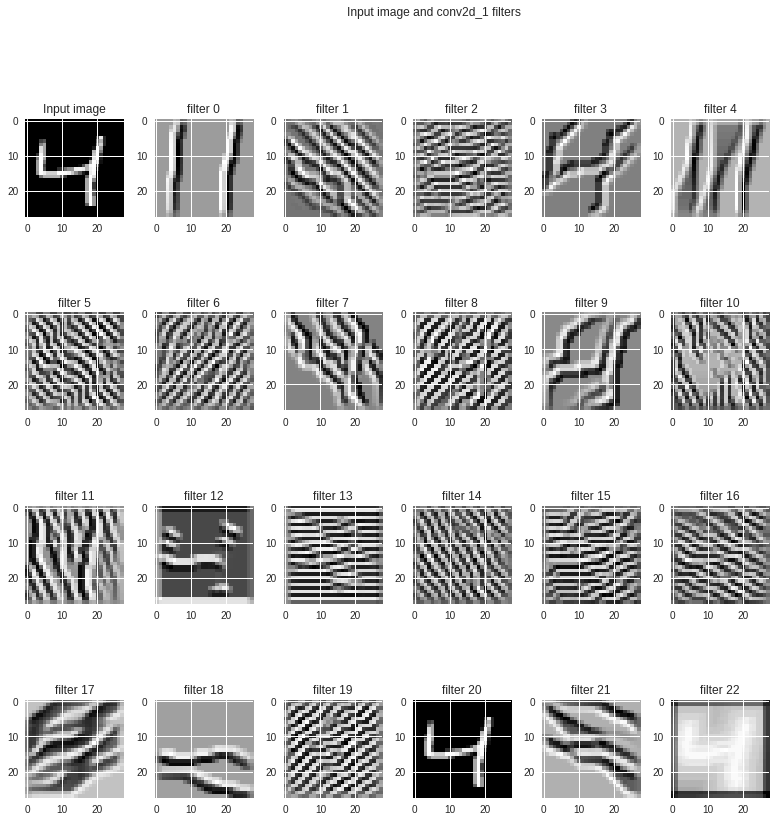

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()